In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Cleaning and Setting Up Data

In [4]:
#Import Data
temperature = pd.read_csv("city_temperature.csv")

#Drop irrelavant columns
temperature = temperature.drop(["State"], axis = 1)

#Drop irrelevant rows
index_temp = temperature[temperature["AvgTemperature"] == -99].index
temperature.drop(index_temp, inplace = True)

#Reducing the Memory Load
temperature["Month"]          = temperature["Month"].astype("category")
temperature["Year"]           = temperature["Year"].astype("category")
temperature["Day"]            = temperature["Day"].astype("category")
temperature["Country"]        = temperature["Country"].astype("category")
temperature["City"]           = temperature["City"].astype("category")

#First Glance
temperature.head()

C:\Users\Amey Joshi\AppData\Local\Temp\ipykernel_11144\3495965591.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temperature = pd.read_csv("city_temperature.csv")


Region  Country     City Month Day  Year  AvgTemperature
0  Africa  Algeria  Algiers     1   1  1995            64.2
1  Africa  Algeria  Algiers     1   2  1995            49.4
2  Africa  Algeria  Algiers     1   3  1995            48.8
3  Africa  Algeria  Algiers     1   4  1995            46.4
4  Africa  Algeria  Algiers     1   5  1995            47.9

In [6]:
#Adding the AvgTemperature_F Column
temperature["AvgTemperature_F"] = temperature["AvgTemperature"]

#Adding the AvgTemperature_C Column
temperature["AvgTemperature_C"] = round((temperature["AvgTemperature_F"]-32) * (5/9),2)

#Dropping the AvgTemperature Column
temperature.drop(["AvgTemperature"], axis = 1, inplace = True)

temperature.head()

Region  Country     City Month Day  Year  AvgTemperature_F  \
0  Africa  Algeria  Algiers     1   1  1995              64.2   
1  Africa  Algeria  Algiers     1   2  1995              49.4   
2  Africa  Algeria  Algiers     1   3  1995              48.8   
3  Africa  Algeria  Algiers     1   4  1995              46.4   
4  Africa  Algeria  Algiers     1   5  1995              47.9   

   AvgTemperature_C  
0             17.89  
1              9.67  
2              9.33  
3              8.00  
4              8.83

In [7]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826655 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column            Dtype   
---  ------            -----   
 0   Region            object  
 1   Country           category
 2   City              category
 3   Month             category
 4   Day               category
 5   Year              category
 6   AvgTemperature_F  float64 
 7   AvgTemperature_C  float64 
dtypes: category(5), float64(2), object(1)
memory usage: 102.5+ MB


In [11]:
#Guage the Total Satisfaction Level
year = []
leap_counter = 0

for i in range(1995,2021):
    year.append(i)
    
for i in year:
    if (i%4 == 0) and (i%100 != 0):
        leap_counter += 1
    elif (i%100 == 0) and (i%400 == 0):
        leap_counter += 1

total_days         = leap_counter*366 + (len(year)-leap_counter)*365
total_entries      = total_days * 321
recd_entries       = temperature.shape[0]
gap                = total_entries - 2826655
data_efficiency    = round((gap/total_entries),2)

print(f'The total entries should be {total_entries}.')
print(f'The total entries recieved are {recd_entries}.')
print(f'The total gap in entries is {gap}.')

if data_efficiency < 0.05:
    print(f"Excellent Satisfaction Level. The Satisfaction Level is {data_efficiency}.")
elif 0.05 < data_efficiency < 0.1:
    print(f"Satisfactory Satisfaction Level. The Satisfaction Level is {data_efficiency}.")
else:
    print(f"Satisfaction Level not met. The Satisfaction Level is {data_efficiency}.")

The total entries should be 3048537.
The total entries recieved are 2826655.
The total gap in entries is 221882.
Satisfactory Satisfaction Level. The Satisfaction Level is 0.07.


#### Region Wise Yearly Mean Temperature

In [10]:
temperature[(temperature["Region"] == "Asia") & (temperature["Year"] == 1995)]["AvgTemperature_F"].mean()

67.26298510125791

In [16]:
# Regions List
region_list = temperature["Region"].drop_duplicates().tolist()

#Year List
year = []
for i in range(1995,2021):
    year.append(i)

In [18]:
#Create Parent Dictionary - Fahrenheit
parent_dict_f = {}

for i in region_list:
    my_dict = {}
    for j in year:
        x = round(temperature[(temperature["Region"] == i) & (temperature["Year"] == j)]["AvgTemperature_F"].mean(),2)
        my_dict[j] = x
    parent_dict_f[i] = my_dict

parent_dict_f

#Create Parent Dictionary - Celsius
parent_dict_c = {}

for i in region_list:
    my_dict = {}
    for j in year:
        x = round(temperature[(temperature["Region"] == i) & (temperature["Year"] == j)]["AvgTemperature_C"].mean(),2)
        my_dict[j] = x
    parent_dict_c[i] = my_dict
    
print(parent_dict_f)
print(parent_dict_c)

{'Africa': {1995: 73.89, 1996: 73.55, 1997: 73.44, 1998: 73.75, 1999: 73.89, 2000: 73.42, 2001: 74.3, 2002: 74.29, 2003: 74.78, 2004: 74.64, 2005: 74.49, 2006: 74.23, 2007: 74.43, 2008: 74.44, 2009: 74.75, 2010: 75.33, 2011: 74.38, 2012: 73.63, 2013: 74.33, 2014: 74.7, 2015: 74.87, 2016: 75.28, 2017: 74.95, 2018: 74.68, 2019: 75.09, 2020: 75.19}, 'Asia': {1995: 67.26, 1996: 67.87, 1997: 68.35, 1998: 69.06, 1999: 68.03, 2000: 67.72, 2001: 67.74, 2002: 68.06, 2003: 67.91, 2004: 68.31, 2005: 67.78, 2006: 68.71, 2007: 68.87, 2008: 68.09, 2009: 68.73, 2010: 68.82, 2011: 67.65, 2012: 67.24, 2013: 67.84, 2014: 67.81, 2015: 68.67, 2016: 68.85, 2017: 68.46, 2018: 68.46, 2019: 68.67, 2020: 61.87}, 'Australia/South Pacific': {1995: 61.2, 1996: 60.96, 1997: 61.58, 1998: 62.03, 1999: 62.1, 2000: 61.86, 2001: 61.82, 2002: 62.17, 2003: 61.88, 2004: 61.86, 2005: 62.34, 2006: 62.07, 2007: 62.68, 2008: 61.76, 2009: 62.65, 2010: 62.3, 2011: 62.13, 2012: 61.74, 2013: 62.89, 2014: 62.85, 2015: 62.51, 2016:

In [20]:
#DataFrame for Regional Mean Temperature - Fahrenheit
temperature_mean_f = pd.DataFrame.from_dict(parent_dict_f)

#DataFrame for Regional Mean Temperature - Celsius
temperature_mean_c = pd.DataFrame.from_dict(parent_dict_c)

In [23]:
#Add Year Column - Fahrenheit
index_year_f = temperature_mean_f.index
temperature_mean_f.insert(0, "Year", index_year_f)

#Add Year Column - Celsius
index_year_c = temperature_mean_c.index
temperature_mean_c.insert(0, "Year", index_year_c)

In [38]:
#Set Year as String - Fahrenheit
temperature_mean_f["Year"] = temperature_mean_f["Year"].astype(str)

#Set Year as String - Celsius
temperature_mean_c["Year"] = temperature_mean_c["Year"].astype(str)

In [47]:
temperature_mean_f["Australia and South Pacific"]             = temperature_mean_f["Australia/South Pacific"]
temperature_mean_f["South and Central America and Carribean"] = temperature_mean_f["South/Central America & Carribean"]

In [49]:
temperature_mean_c["Australia and South Pacific"]             = temperature_mean_c["Australia/South Pacific"]
temperature_mean_c["South and Central America and Carribean"] = temperature_mean_c["South/Central America & Carribean"]

In [53]:
temperature_mean_f.drop(["Australia/South Pacific", "South/Central America & Carribean"], axis = 1, inplace = True)
temperature_mean_c.drop(["Australia/South Pacific", "South/Central America & Carribean"], axis = 1, inplace = True)

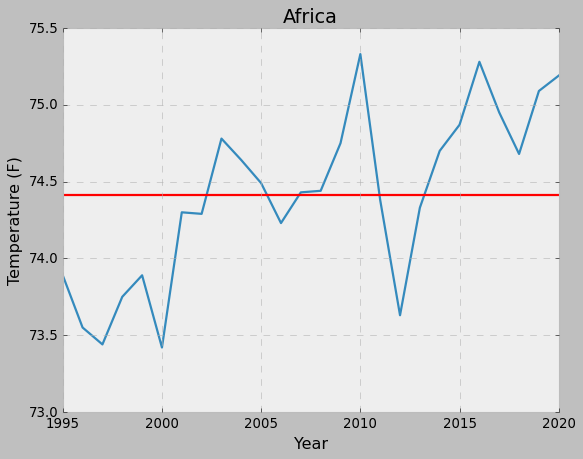

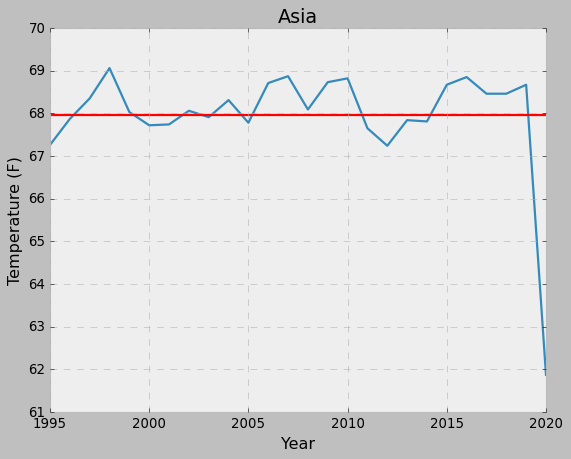

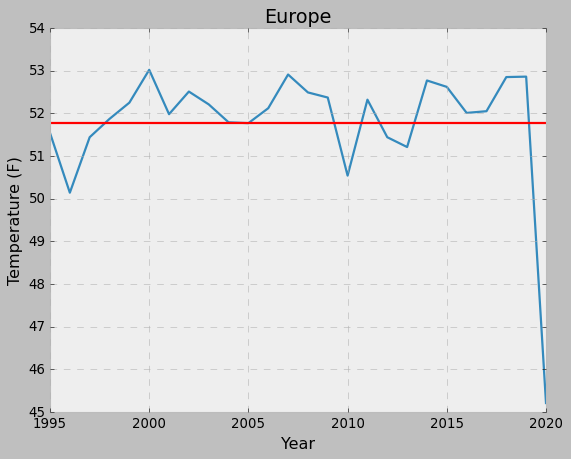

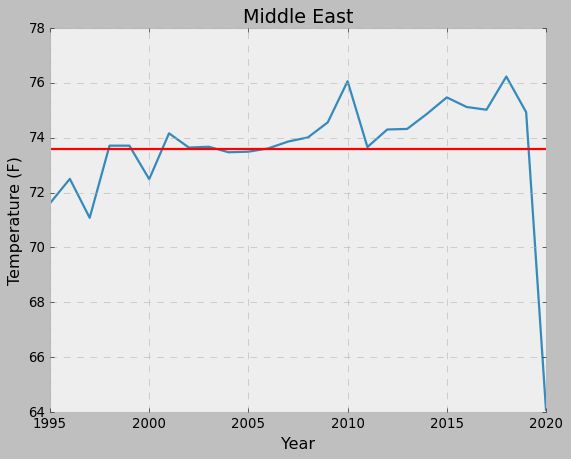

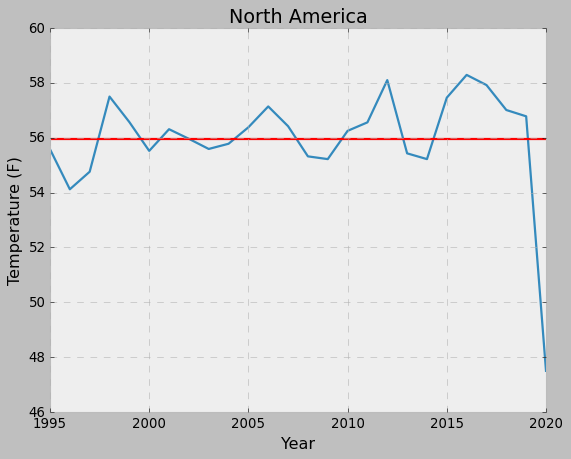

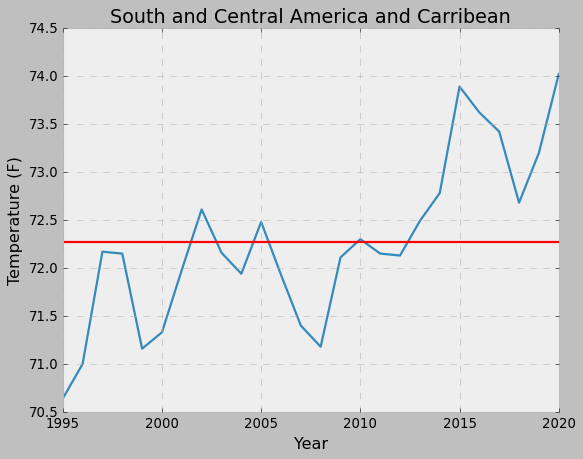

In [55]:
#Saving Images - Fahrenheit
for column in temperature_mean_f.columns[1:]:
    plt.style.use("bmh")
    temperature_mean_f.plot(x = "Year", y = column)
    plt.axhline(round(temperature_mean_f[column].mean(),2), color = "red")
    plt.title(column)
    plt.legend().remove()
    plt.xlabel("Year")
    plt.ylabel("Temperature (F)")
    plt.savefig(f'{column}_F.png', bbox_inches = "tight")

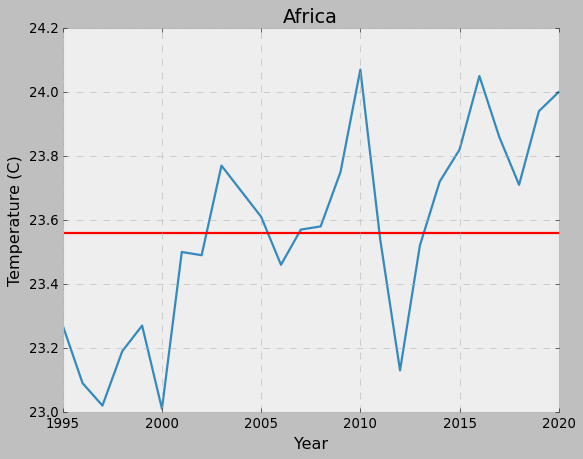

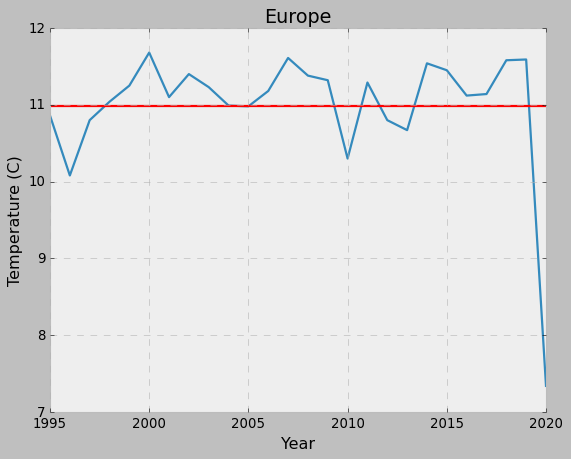

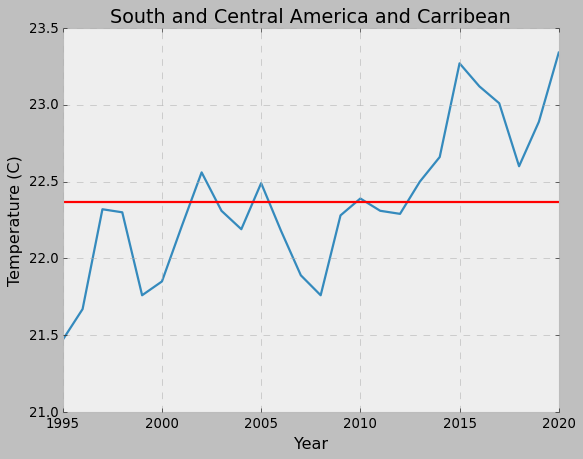

In [56]:
#Saving Images - Celsius
for column in temperature_mean_c.columns[1:]:
    plt.style.use("bmh")
    temperature_mean_c.plot(x = "Year", y = column)
    plt.axhline(round(temperature_mean_c[column].mean(),2), color = "red")
    plt.title(column)
    plt.legend().remove()
    plt.xlabel("Year")
    plt.ylabel("Temperature (C)")
    plt.savefig(f'{column}_C.png', bbox_inches = "tight")